# Recommending Books
### This practice is a recreation of the learning material in the course. The difference here is the subject matter. Rather than recommending movies, this analysis will recommend books. Another large difference is the course provides a dataset with users and their particular ratings of each movie. Here I was only able to gather data on books that did not have individual ratings. Rather the dataset featured average scores based on the rating count also featured.  
### My solution to the issue of having no user data is to create a dataset that does. The following code chunks load in the books.csv. I then select the 50 most popular books based on ratings_count. Next, I create a dataset of 500,000 instances of these top 50 books. Then, I generate random values in the range of 1-5 for each of the 500,000 instances previously created. This is similar to what a rating system would be in reality. Next, I create a set of eight 'readers' who would have rated the books, also based on the total book count. Finally, I combine these three data frames into one for analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from itertools import cycle, islice

In [2]:
books = pd.read_csv('books.csv')
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [3]:
books = pd.DataFrame(books)
books_small = books[books['ratings_count']>700000]
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13719 entries, 0 to 13718
Data columns (total 10 columns):
bookID                13719 non-null int64
title                 13719 non-null object
authors               13719 non-null object
average_rating        13719 non-null object
isbn                  13719 non-null object
isbn13                13719 non-null object
language_code         13719 non-null object
# num_pages           13719 non-null object
ratings_count         13719 non-null int64
text_reviews_count    13719 non-null int64
dtypes: int64(3), object(7)
memory usage: 1.0+ MB


In [4]:
book_titles = pd.DataFrame(books_small['title'])

book_titles = book_titles.reset_index(drop=True)

dfList = list(book_titles['title'])
book_titles = pd.DataFrame(dfList*10000)
book_titles.info()

book_ratings = pd.DataFrame(np.random.choice([1,2,3,4,5], p=[0.1,0.3,0.15,.15,0.3], size=(len(book_titles))))

it = cycle([47,68,77,600,333,546,4747,999])
book_readers= pd.DataFrame(list(islice(it, len(book_titles))))

books_rec=pd.concat([book_titles,book_ratings,book_readers], axis=1)
books_rec.columns = ['titles','rating','reader']
books_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 1 columns):
0    500000 non-null object
dtypes: object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 3 columns):
titles    500000 non-null object
rating    500000 non-null int64
reader    500000 non-null int64
dtypes: int64(2), object(1)
memory usage: 11.4+ MB


In [5]:
ratings=pd.DataFrame(books_rec.groupby('titles')['rating'].mean())
ratings.head()

,rating
titles,
A Game of Thrones (A Song of Ice and Fire #1),3.2425
Angels & Demons (Robert Langdon #1),3.2331
Animal Farm,3.2647
Brave New World,3.2349
Charlotte's Web,3.2506


#### The ratings in this randomly generated data appear to be within the window of 3.22 - 3.28 on average.

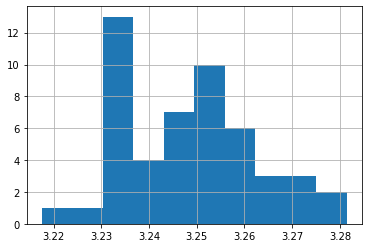

In [6]:
ratings['rating'].hist(bins=10)

#### Following the learning material, it is essential to create a pivot table based on the dataset. This is important because we must analyze the correlation between the titles and their scores. In order to do this we must create another matrix with the book titles as column names.

In [7]:
booksmat = books_rec.pivot_table(index='reader',columns='titles',values='rating')
booksmat.head(10)

titles,A Game of Thrones (A Song of Ice and Fire #1),Angels & Demons (Robert Langdon #1),Animal Farm,Brave New World,Charlotte's Web,Dracula,Eat Pray Love,Frankenstein,Gone with the Wind,Harry Potter and the Chamber of Secrets (Harry Potter #2),...,The Picture of Dorian Gray,The Secret Garden,The Secret Life of Bees,The Shining (The Shining #1),The Time Traveler's Wife,Twilight (Twilight #1),Water for Elephants,Where the Sidewalk Ends,Where the Wild Things Are,Wuthering Heights
reader,,,,,,,,,,,,,,,,,,,,,
47,NaN,3.2204,3.2728,3.2392,3.2152,NaN,3.2676,3.2444,NaN,NaN,...,3.1952,3.2688,NaN,3.2424,3.2592,3.2684,NaN,3.2508,NaN,3.2400
68,3.2176,NaN,NaN,NaN,NaN,3.2676,NaN,NaN,3.2684,3.2332,...,NaN,NaN,3.2432,NaN,NaN,NaN,3.288,NaN,3.2844,NaN
77,NaN,3.2524,3.2680,3.1836,3.2788,NaN,3.2504,3.2972,NaN,NaN,...,3.2828,3.2332,NaN,3.2120,3.2684,3.2660,NaN,3.2276,NaN,3.2772
333,NaN,3.2320,3.2924,3.2344,3.2348,NaN,3.3140,3.2572,NaN,NaN,...,3.2204,3.2628,NaN,3.2804,3.2688,3.1972,NaN,3.2460,NaN,3.2304
546,3.2492,NaN,NaN,NaN,NaN,3.2860,NaN,NaN,3.2744,3.3052,...,NaN,NaN,3.2536,NaN,NaN,NaN,3.254,NaN,3.2340,NaN
600,3.2428,NaN,NaN,NaN,NaN,3.2424,NaN,NaN,3.2016,3.2996,...,NaN,NaN,3.2628,NaN,NaN,NaN,3.256,NaN,3.2344,NaN
999,3.2604,NaN,NaN,NaN,NaN,3.2444,NaN,NaN,3.2676,3.2528,...,NaN,NaN,3.2068,NaN,NaN,NaN,3.290,NaN,3.2288,NaN
4747,NaN,3.2276,3.2256,3.2824,3.2736,NaN,3.2108,3.2504,NaN,NaN,...,3.2316,3.2660,NaN,3.2132,3.2136,3.2540,NaN,3.2820,NaN,3.2584


In [8]:
BNW = booksmat["Brave New World"]
BNW

reader
47      3.2392
68         NaN
77      3.1836
333     3.2344
546        NaN
600        NaN
999        NaN
4747    3.2824
Name: Brave New World, dtype: float64

In [9]:
similar_to_BNW = booksmat.corrwith(BNW)
similar_to_BNW

titles
A Game of Thrones (A Song of Ice and Fire  #1)                       NaN
Angels & Demons (Robert Langdon  #1)                           -0.783851
Animal Farm                                                    -0.587800
Brave New World                                                 1.000000
Charlotte's Web                                                -0.133841
Dracula                                                              NaN
Eat  Pray  Love                                                -0.354468
Frankenstein                                                   -0.839895
Gone with the Wind                                                   NaN
Harry Potter and the Chamber of Secrets (Harry Potter  #2)           NaN
Harry Potter and the Half-Blood Prince (Harry Potter  #6)       0.978185
Harry Potter and the Order of the Phoenix (Harry Potter  #5)         NaN
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)          NaN
Harry Potter and the Sorcerer's Stone (Harry

In [10]:
corr_BNW = pd.DataFrame(similar_to_BNW,columns=['Correlation'])
corr_BNW.dropna(inplace=True)
corr_BNW = corr_BNW.join(ratings['rating'])
corr_BNW=corr_BNW.sort_values('Correlation',ascending=False)
corr_BNW.head(10)

,Correlation,rating
titles,,
Brave New World,1.000000,3.2349
Harry Potter and the Half-Blood Prince (Harry Potter #6),0.978185,3.2478
Where the Sidewalk Ends,0.975453,3.2516
The Secret Garden,0.846509,3.2577
The Fellowship of the Ring (The Lord of the Rings #1),0.520715,3.2325
Of Mice and Men,0.351253,3.2397
The Odyssey,0.232570,3.2499
Jane Eyre,0.093369,3.2789
The Shining (The Shining #1),0.039337,3.2370


### This final table is the top 9 books related to *Brave New World*. If an individual were to read this book, this analysis would then recommend these items to also read. 